In [8]:
from pydantic import Field, BaseModel
from langgraph.graph import StateGraph
import math

In [9]:
class AgentState(BaseModel):
    name: str
    values: list[int]
    operation: str
    result: str | None = None

In [10]:
def multi_values(state: AgentState) -> AgentState:

    if state.operation == "+":
        state.result = f"Hi {state.name}, your answer is: {sum(state.values)}"

    elif state.operation == "*":
        state.result = f"Hi {state.name}, your answer is: {math.prod(state.values)}"

    else:
        state.result = "invalid input..."

    return state

In [11]:
graph = StateGraph(AgentState)

graph.add_node("processer", multi_values)
graph.set_entry_point("processer")
graph.set_finish_point("processer")

app = graph.compile()

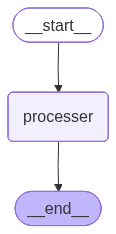

In [12]:
app

In [13]:
response = app.invoke({
    "name": "bob",
    "values": [1, 2213, 3, 4],
    "operation": '*'
})

In [14]:
response["result"]

'Hi bob, your answer is: 26556'